<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/CS666_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

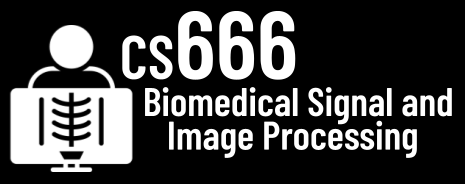
# Assignment 6

In [ ]:
# NAME:Lahasya Kakkadde Rajanna


In [ ]:
# In this assignment, we will explore the new Segment-Anything-Model (https://segment-anything.com/)
# for the task of mitochondria detection in a connectomics dataset acquired using electron microscopy.
#
# We will run the following experiments:
#
# 1. Using the Segment-Anything-Model (SAM) without seeds in auto mode
#
# 2. Train a U-Net classifier from scratch
#
# 3. Evaluate the U-Net classifier
#
# 4. Use the U-Net to seed the SAM model (U-Net + SAM)
#
# 5. Compare U-Net vs. U-Net + SAM
#
# Bonus: Improve U-Net + SAM

In [ ]:
### IMPORTANT (DO THIS RIGHT AWAY!) ###
#
# Activate GPU support: Runtime -> Change Runtime Type
# Hardware Accelerator: GPU
#
### IMPORTANT ###

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# We will use mahotas as well!
!pip install mahotas --no-binary :all:
import mahotas as mh

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: mahotas is being installed using the legacy 'setup.py install' method, because the '--no-binary' option was enabled for it and this currently disables local wheel building for projects that don't have a 'pyproject.toml' file. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussio

In [ ]:
# And of course, we need the data!
!wget https://cs666.org/data/mito.npz

--2023-04-24 18:44:50--  https://cs666.org/data/mito.npz
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37610178 (36M) [application/octet-stream]
Saving to: ‘mito.npz’

mito.npz            100%[===================>]  35.87M   193MB/s    in 0.2s    

2023-04-24 18:44:50 (193 MB/s) - ‘mito.npz’ saved [37610178/37610178]



## 0. Data loading (5 points)

In [ ]:
# The data includes images and manually segmented masks.
loaded = np.load('mito.npz')
images = loaded['arr_0'][0]
masks = loaded['arr_0'][1]

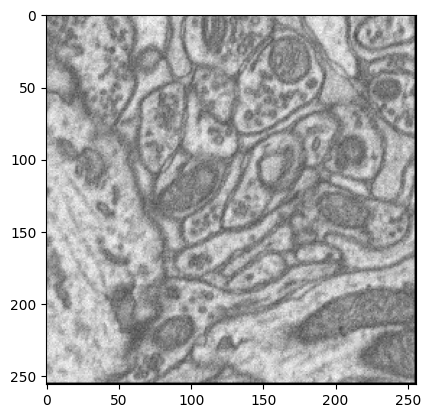

In [ ]:
# TODO: Show the first image with the gray colormap.
# TODO: YOUR_CODE
plt.imshow(images[0], cmap='gray')

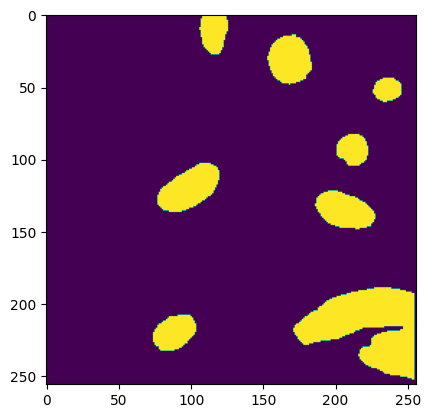

In [ ]:
# TODO: Show the first mask.
plt.imshow(masks[0])

## 1. SAM in AUTO mode (15 points)

In [ ]:
# We will use the METASEG package as an easy-to-use layer
# for SAM.
!pip install metaseg==0.6.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 8.0 MB/s eta 0:00:00
  Created wheel for metaseg: filename=metaseg-0.6.1-py3-none-any.whl size=44772 sha256=dc434f2fe3d1ff7bc6c218518431905534c31da56ddd387dacb7cea36cb47535
  Stored in directory: /root/.cache/pip/wheels/b1/0c/bd/5e8d8f9aa755ac2f82e75b9391db0d403f760a4654b19c8b6c
Successfully built metas

In [ ]:
# SAM comes in two modes, auto and with seeds
from metaseg import SegAutoMaskPredictor, SegManualMaskPredictor

In [ ]:
# SAM takes files as input!
# So we have to store the numpy array to disk.
mh.imsave('first.png', images[0])

In [ ]:
#
# Run SAM in auto mode on first.png and store
# the result as first_output.png.
#
results = SegAutoMaskPredictor().image_predict(
    source="first.png",
    model_type="vit_l", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="first_output.png",
    show=False,
    save=True,
)

vit_l model already exists as 'vit_l.pth'. Skipping download.


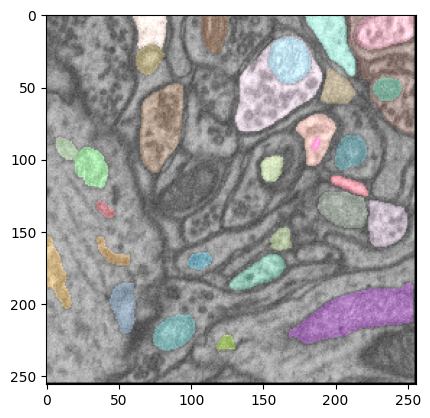

In [ ]:
imshow( mh.imread('first_output.png') )

In [ ]:
# TODO: Does SAM work well for mitochondria detection?
# TODO: YOUR_ANSWER
# Yes - SAM works pretty well for mitochondria detection


yes - SAM works pretty well for mitochondria detection

In [ ]:
# TODO: Try the auto predictor on your image!
# 
# Please upload your own image and test how well
# the auto mode of SAM performs!
#
# Run SAM in auto mode on that image and store
# the result as second_output.png. Show the output!
#

vit_l model already exists as 'vit_l.pth'. Skipping download.


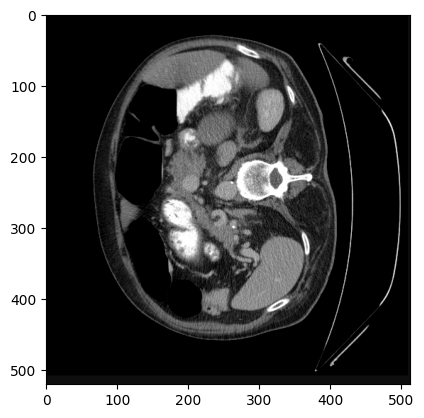

In [ ]:
# TODO: YOUR CODE
#link for image - https://i.stack.imgur.com/nrsdq.png
imshow( mh.imread('second_image.png') )

results = SegAutoMaskPredictor().image_predict(
    source="second_image.png",
    model_type="vit_l", # vit_l, vit_h, vit_b
    points_per_side=16, 
    points_per_batch=64,
    min_area=0,
    output_path="second_output.png",
    show=False,
    save=True,
)

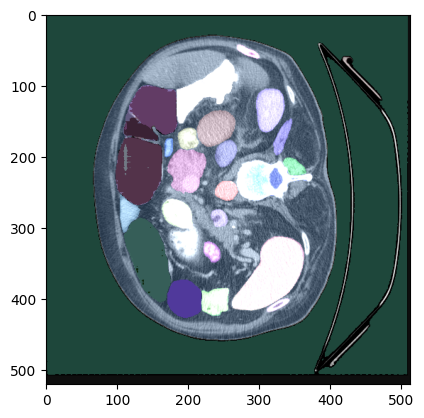

In [ ]:
imshow( mh.imread('second_output.png') )

In [ ]:
# TODO: Does SAM work well on your example?
# TODO: YOUR_ANSWER
#Yes - it looks good

yes

## 2. Train a U-Net classifier from scratch (50 points)


In [ ]:
# We will use the keras_unet package!
#
# HINT: There is documentation available here, if you are stuck during this part
# of the assignment: https://github.com/karolzak/keras-unet
!pip install keras_unet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# keras_unet has convenience functions to visualize data
from keras_unet.utils import plot_imgs

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


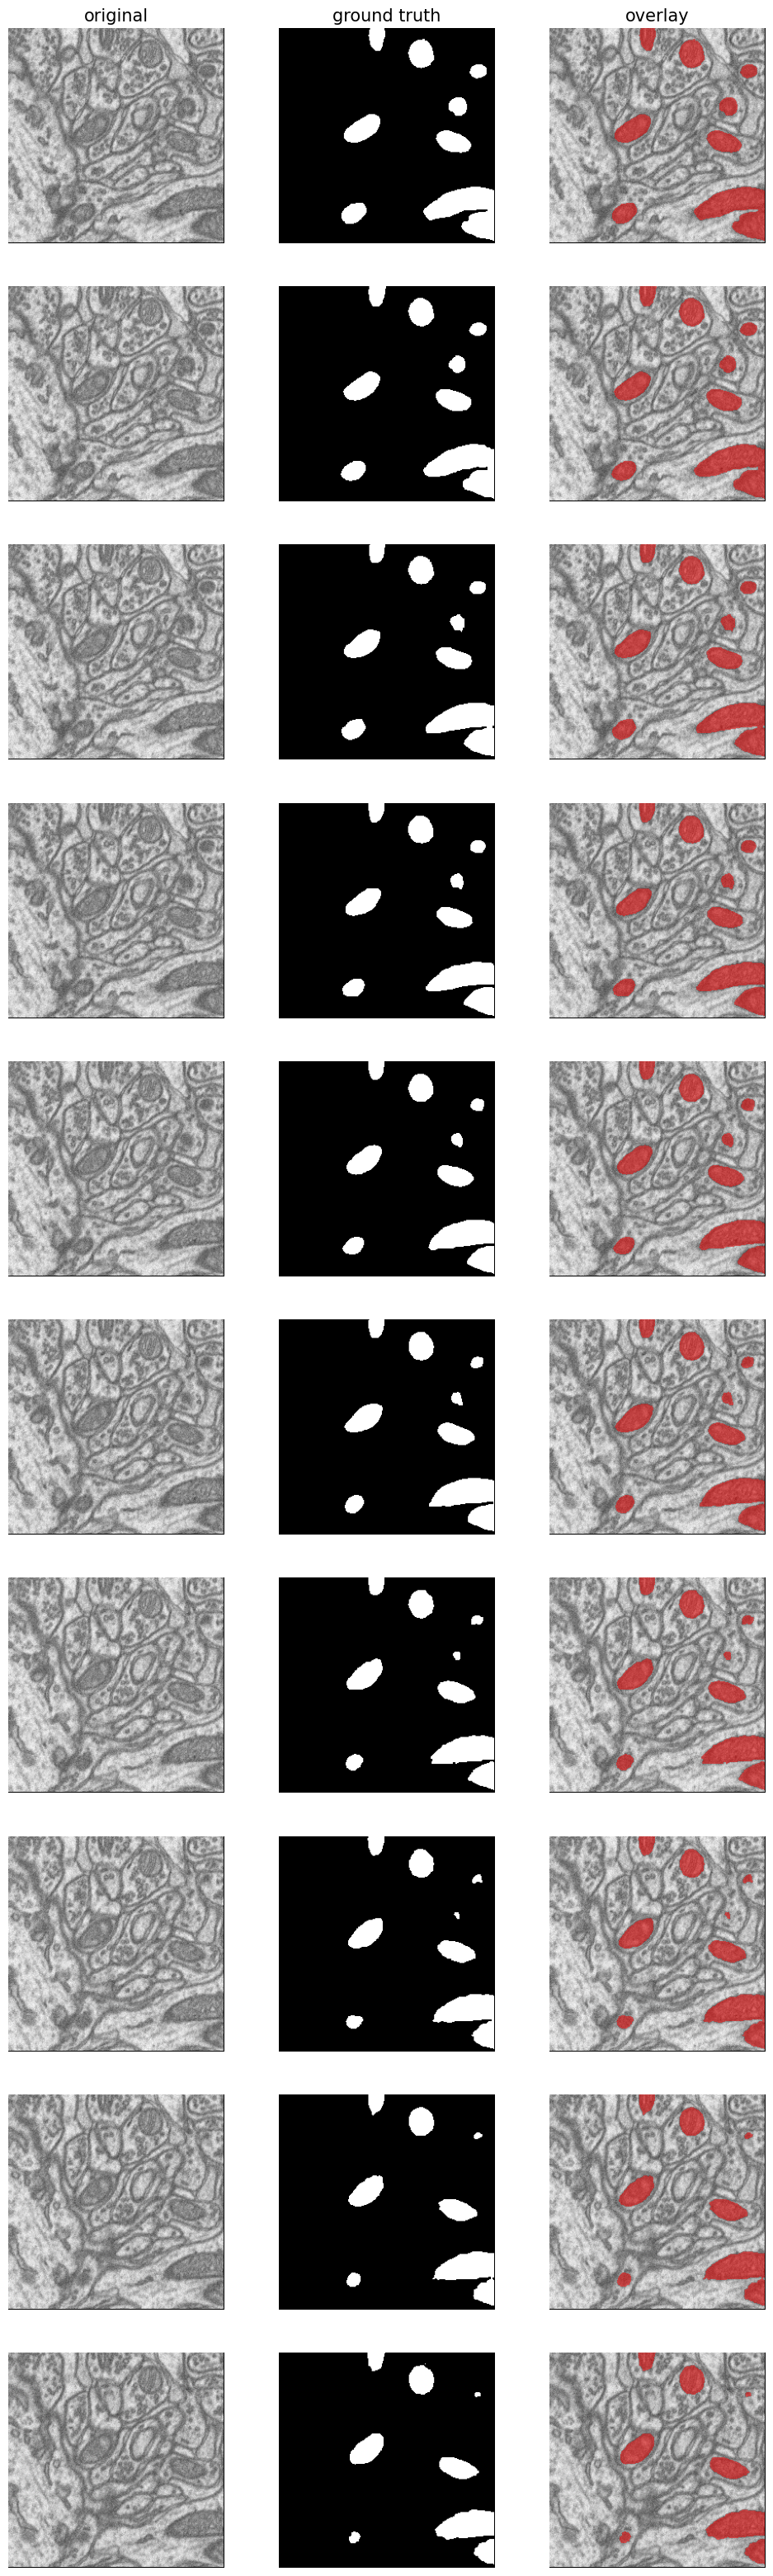

In [ ]:
# Let's plot a few images and masks.
plot_imgs(org_imgs=images, mask_imgs=masks)

In [ ]:
# The images are in this format.
print( images.shape, images.max(), images.dtype )

(660, 256, 256) 243 uint8


In [ ]:
# TODO convert the format to the following:
# (660, 256, 256, 1) 1.0 float32
#
# 1) convert to float32
# 2) normalize to the range of 0..1
# 3) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# X = 
X = np.asarray(images, dtype=np.float32)/images.max()  #coverting to float and normalization
X= X.reshape(660,256,256,1)






In [ ]:
# Validate that everything matches accordingly
print( X.shape, X.max(), X.dtype )

(660, 256, 256, 1) 1.0 float32


In [ ]:
# The masks are in this format.
print( masks.shape, masks.max(), masks.dtype )

(660, 256, 256) 255 uint8


In [ ]:
# TODO convert the format to the following:
# (660, 256, 256, 1) True bool
#
# 1) convert to bool
# 2) Add the last channel using .reshape like in class
#
# TODO: YOUR_CODE
# y = 
y = np.asarray(masks, dtype=np.bool)
y = y.reshape(660,256,256,1)


<ipython-input-16-de64033a3f55>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.asarray(masks, dtype=np.bool)


In [ ]:
# Validate that everything matches accordingly
print( y.shape, y.max(), y.dtype )

(660, 256, 256, 1) True bool


In [ ]:
#
# Now we will create our train/val/test splits using scikit-learn!
#
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (369, 256, 256, 1)
y_train:  (369, 256, 256, 1)
X_val:  (159, 256, 256, 1)
y_val:  (159, 256, 256, 1)
X_test:  (132, 256, 256, 1)
y_test:  (132, 256, 256, 1)


In [ ]:
# TODO: Why do we call train_test_split twice?
# TODO: YOUR_ANSWER
# First one is to split the original dataset into to training set and testing set while the second one is to split the training set again into validation set and training set.

First one is to split the original dataset into to training set and testing set while the second one is to split the training set again into validation set and training set.

In [ ]:
#
# We will use keras_unet's built-in data augmentation
# functionality.
#
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    X_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))

In [ ]:
# TODO: Please explain the code from above.
# TODO: YOUR_ANSWER
# 1.  Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize
# 2.  Here we use rotate, shift, shear, zoom, flip the originial images randomly in order to generate a set of augmented dataset for training
# 3. Each argument is explained below:
#      1. batch size =2 means it will yield two batches.
#     2. rotation_range=15 means the range of rotation angles are set to 15 degrees (A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.)
#      3. width_shift_range=0.05 and height_shift_range=0.05 means 
#        * A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.
#        * The value 0.05 indicates the percentage (between 0 and 1) of the width or height of the image to shift
#      4. shear_range=50 means shear angle is set to 50 degree
#      5. zoom_range=0.2 means the zoom range is set to 0.2
#      6. horizontal_flip=True and vertical_flip=True means the images can be randomly flipped horizontally and vertically(An image flip means 
#         reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.)
#      7. fill_mode='constant' means that to fill the pixels outside the boundaries of the image after augmentation as constant values


#reference : https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/




1.  Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize
2.  Here we use rotate, shift, shear, zoom, flip the originial images randomly in order to generate a set of augmented dataset for training
3. Each argument is explained below:
    1. batch size =2 means it will yield two batches.
    2. rotation_range=15 means the range of rotation angles are set to 15 degrees (A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.)
    3. width_shift_range=0.05 and height_shift_range=0.05 means 
      * A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.
      * The value 0.05 indicates the percentage (between 0 and 1) of the width or height of the image to shift
    4. shear_range=50 means shear angle is set to 50 degree
    5. zoom_range=0.2 means the zoom range is set to 0.2
    6. horizontal_flip=True and vertical_flip=True means the images can be randomly flipped horizontally and vertically(An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.)
    7. fill_mode='constant' means that to fill the pixels outside the boundaries of the image after augmentation as constant values



(2, 256, 256, 1) (2, 256, 256, 1)


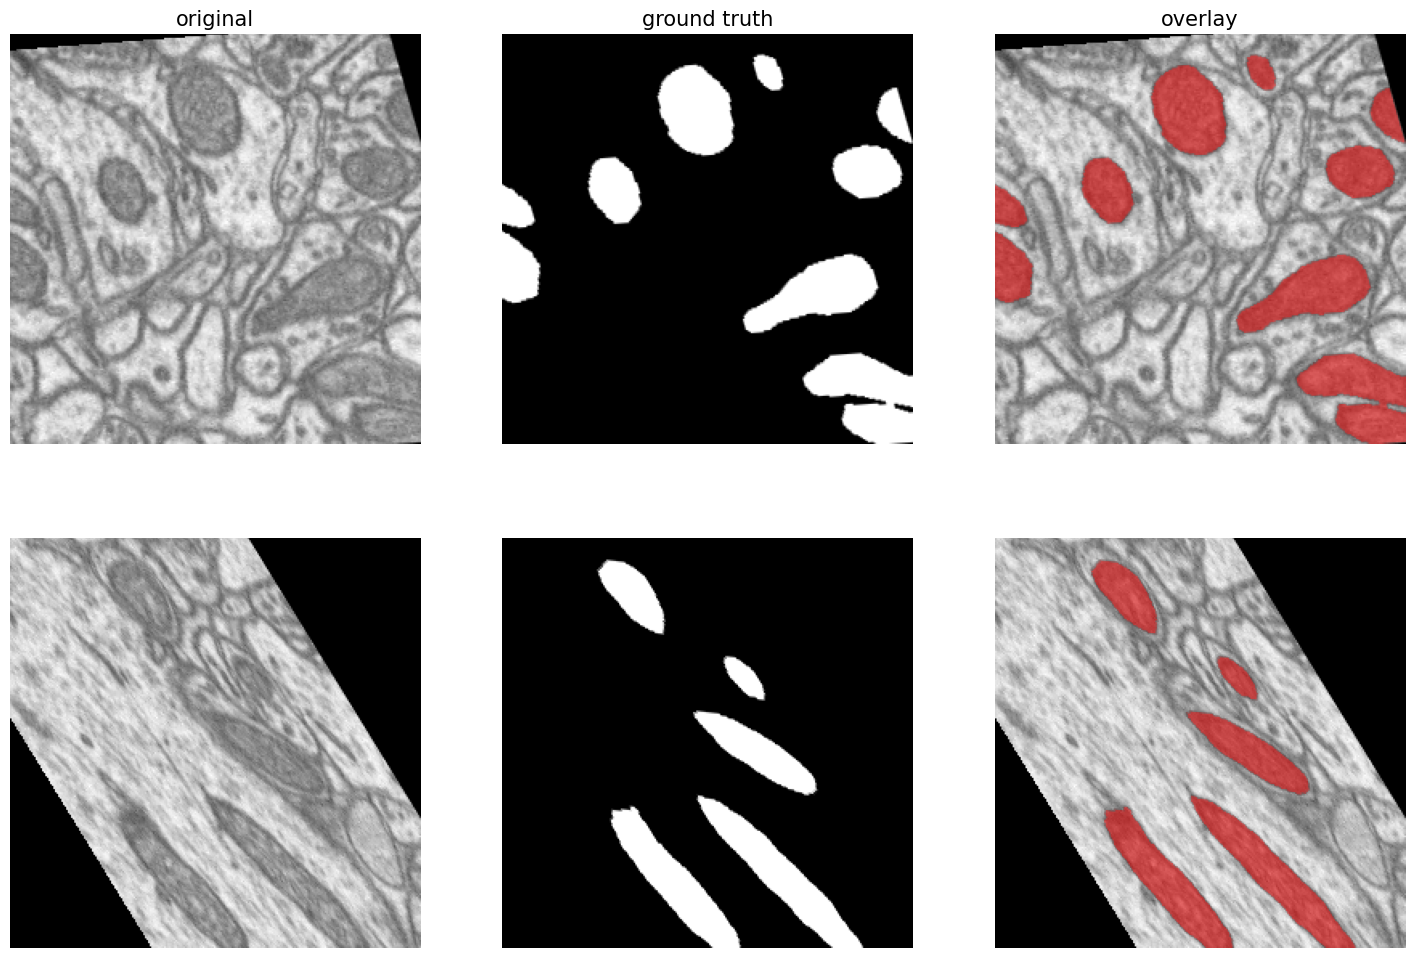

In [ ]:
# Run the following code to visualize augmented examples.
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [ ]:
#
# Now, we set up a U-Net classifier.
#
from keras_unet.models import custom_unet

model = custom_unet(
    X_train[0].shape,
    use_batch_norm=False,
    num_classes=1,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid'
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 spatial_dropout2d (SpatialDrop  (None, 256, 256, 64  0          ['conv2d[0][0]']                 
 out2D)                         )                                                             

In [ ]:
# TODO: How many  trainable parameters does the model use?
# TODO: YOUR_ANSWER
#Trainable params: 31,030,593

31,030,593 trainable parameters are used by this model

In [ ]:
#
# Let's compile the model. Please use a LEARNING_RATE of 0.01
# and a MOMENTUM of 0.99.
#
LEARNING_RATE = 0.01
MOMENTUM = 0.99

In [ ]:
#
# We will use Stochastic Gradient Descent as optimizer
# and use IoU as a metric.
#
from keras.optimizers import SGD
from keras_unet.metrics import iou, iou_thresholded

model.compile(
    optimizer=SGD(learning_rate=LEARNING_RATE, momentum=MOMENTUM),
    loss='binary_crossentropy',
    metrics=[iou, iou_thresholded]
)

In [ ]:
# TODO: Please explain Intersect-over-Union (IoU) in just a few sentences.
# TODO: YOUR_ANSWER

# Intersection over Union is an evaluation metric used to measure the accuracy of an object detector on a particular dataset.

# More formally, in order to apply Intersection over Union to evaluate an (arbitrary) object detector we need:
# The ground-truth bounding boxes (i.e., the hand labeled bounding boxes from the testing set that specify where in the image our object is).
# The predicted bounding boxes from our model.
#reference : https://stackoverflow.com/questions/28723670/intersection-over-union-between-two-detections

Intersection over Union is an evaluation metric used to measure the accuracy of an object detector on a particular dataset.

More formally, in order to apply Intersection over Union to evaluate an (arbitrary) object detector we need:

 * The ground-truth bounding boxes (i.e., the hand labeled bounding boxes from the testing set that specify where in the image our object is).
 * The predicted bounding boxes from our model.

example image:

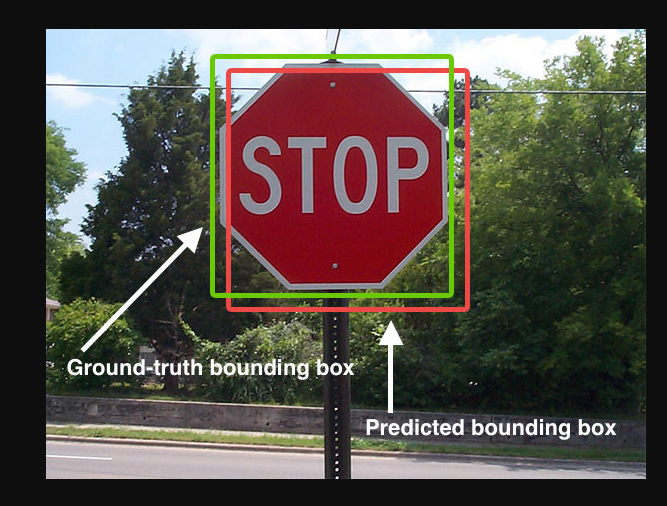

In [ ]:
#
# Now let's train the model for 30 epochs!
#
# TODO: Please complete the code below.
# Hint: Don't forget to use the train_gen from above as training data.
# Hint 2: Please don't forget (X_val, y_val) as validation data.
# Hint 3: steps_per_epoch should be set to all of the X_train.
# Hint 4: This will take roughly 30 minutes.
# Hint 5: If you are stuck, look through the repo of keras_unet!
#


history = model.fit(
   train_gen, 
   validation_data = (X_val,y_val),
   epochs = 30,
   steps_per_epoch = len(X_train)
)

Epoch 1/30
369/369 [==============================] - 114s 266ms/step - loss: 0.2241 - iou: 0.0647 - iou_thresholded: 1.4484e-04 - val_loss: 0.2232 - val_iou: 0.1560 - val_iou_thresholded: 6.0699e-06
Epoch 2/30
369/369 [==============================] - 57s 153ms/step - loss: 0.1683 - iou: 0.1434 - iou_thresholded: 0.1009 - val_loss: 0.1615 - val_iou: 0.2102 - val_iou_thresholded: 0.3147
Epoch 3/30
369/369 [==============================] - 57s 155ms/step - loss: 0.1348 - iou: 0.2479 - iou_thresholded: 0.2798 - val_loss: 0.1109 - val_iou: 0.3521 - val_iou_thresholded: 0.5250
Epoch 4/30
369/369 [==============================] - 58s 156ms/step - loss: 0.1032 - iou: 0.3492 - iou_thresholded: 0.4071 - val_loss: 0.0798 - val_iou: 0.4810 - val_iou_thresholded: 0.6653
Epoch 5/30
369/369 [==============================] - 57s 155ms/step - loss: 0.0949 - iou: 0.4037 - iou_thresholded: 0.5075 - val_loss: 0.0674 - val_iou: 0.5992 - val_iou_thresholded: 0.7075
Epoch 6/30
369/369 [================

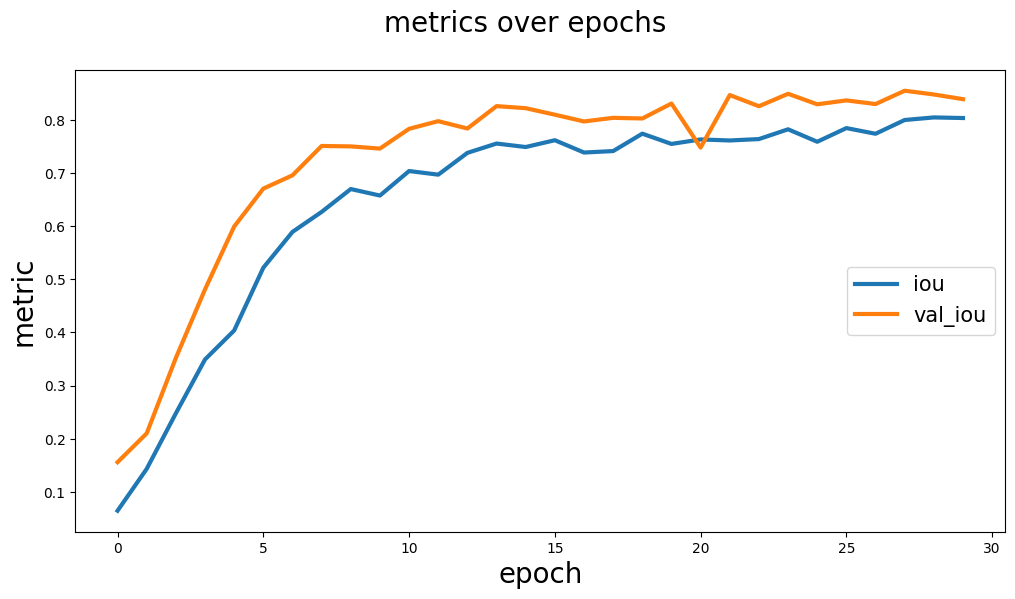

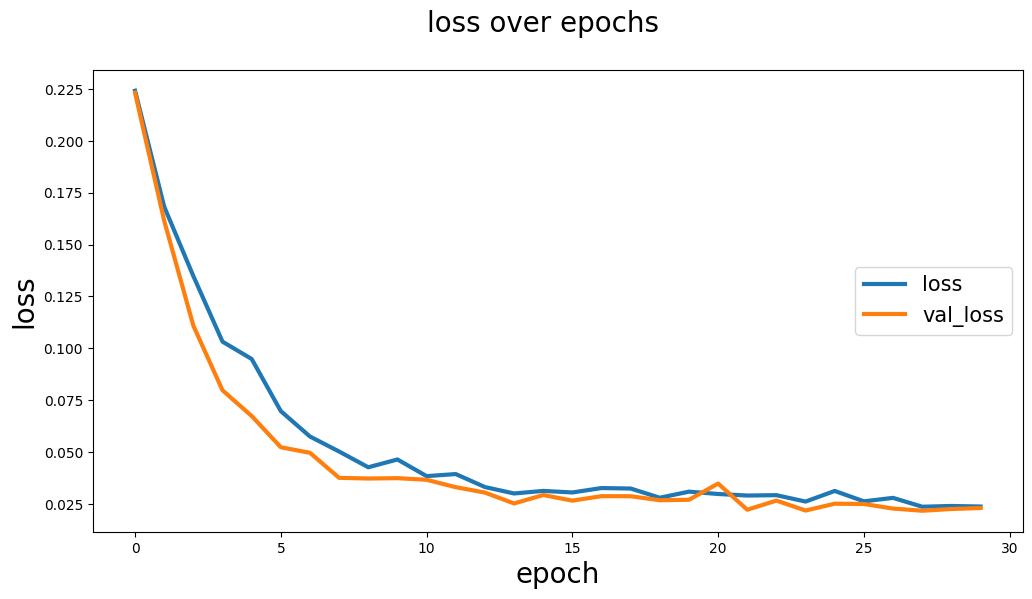

In [ ]:
# We can use keras_unet functionality to visualize metrics and loss during training.
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [ ]:
# TODO: Do these plots look good to you?
# TODO: YOUR_ANSWER
# Yes, those plots looks good to me

yes, those plots looks good to me

## 3. Evaluate U-Net (10 points)

In [ ]:
# Let's predict all of X_test
y_pred = model.predict(X_test)

5/5 [==============================] - 4s 1s/step


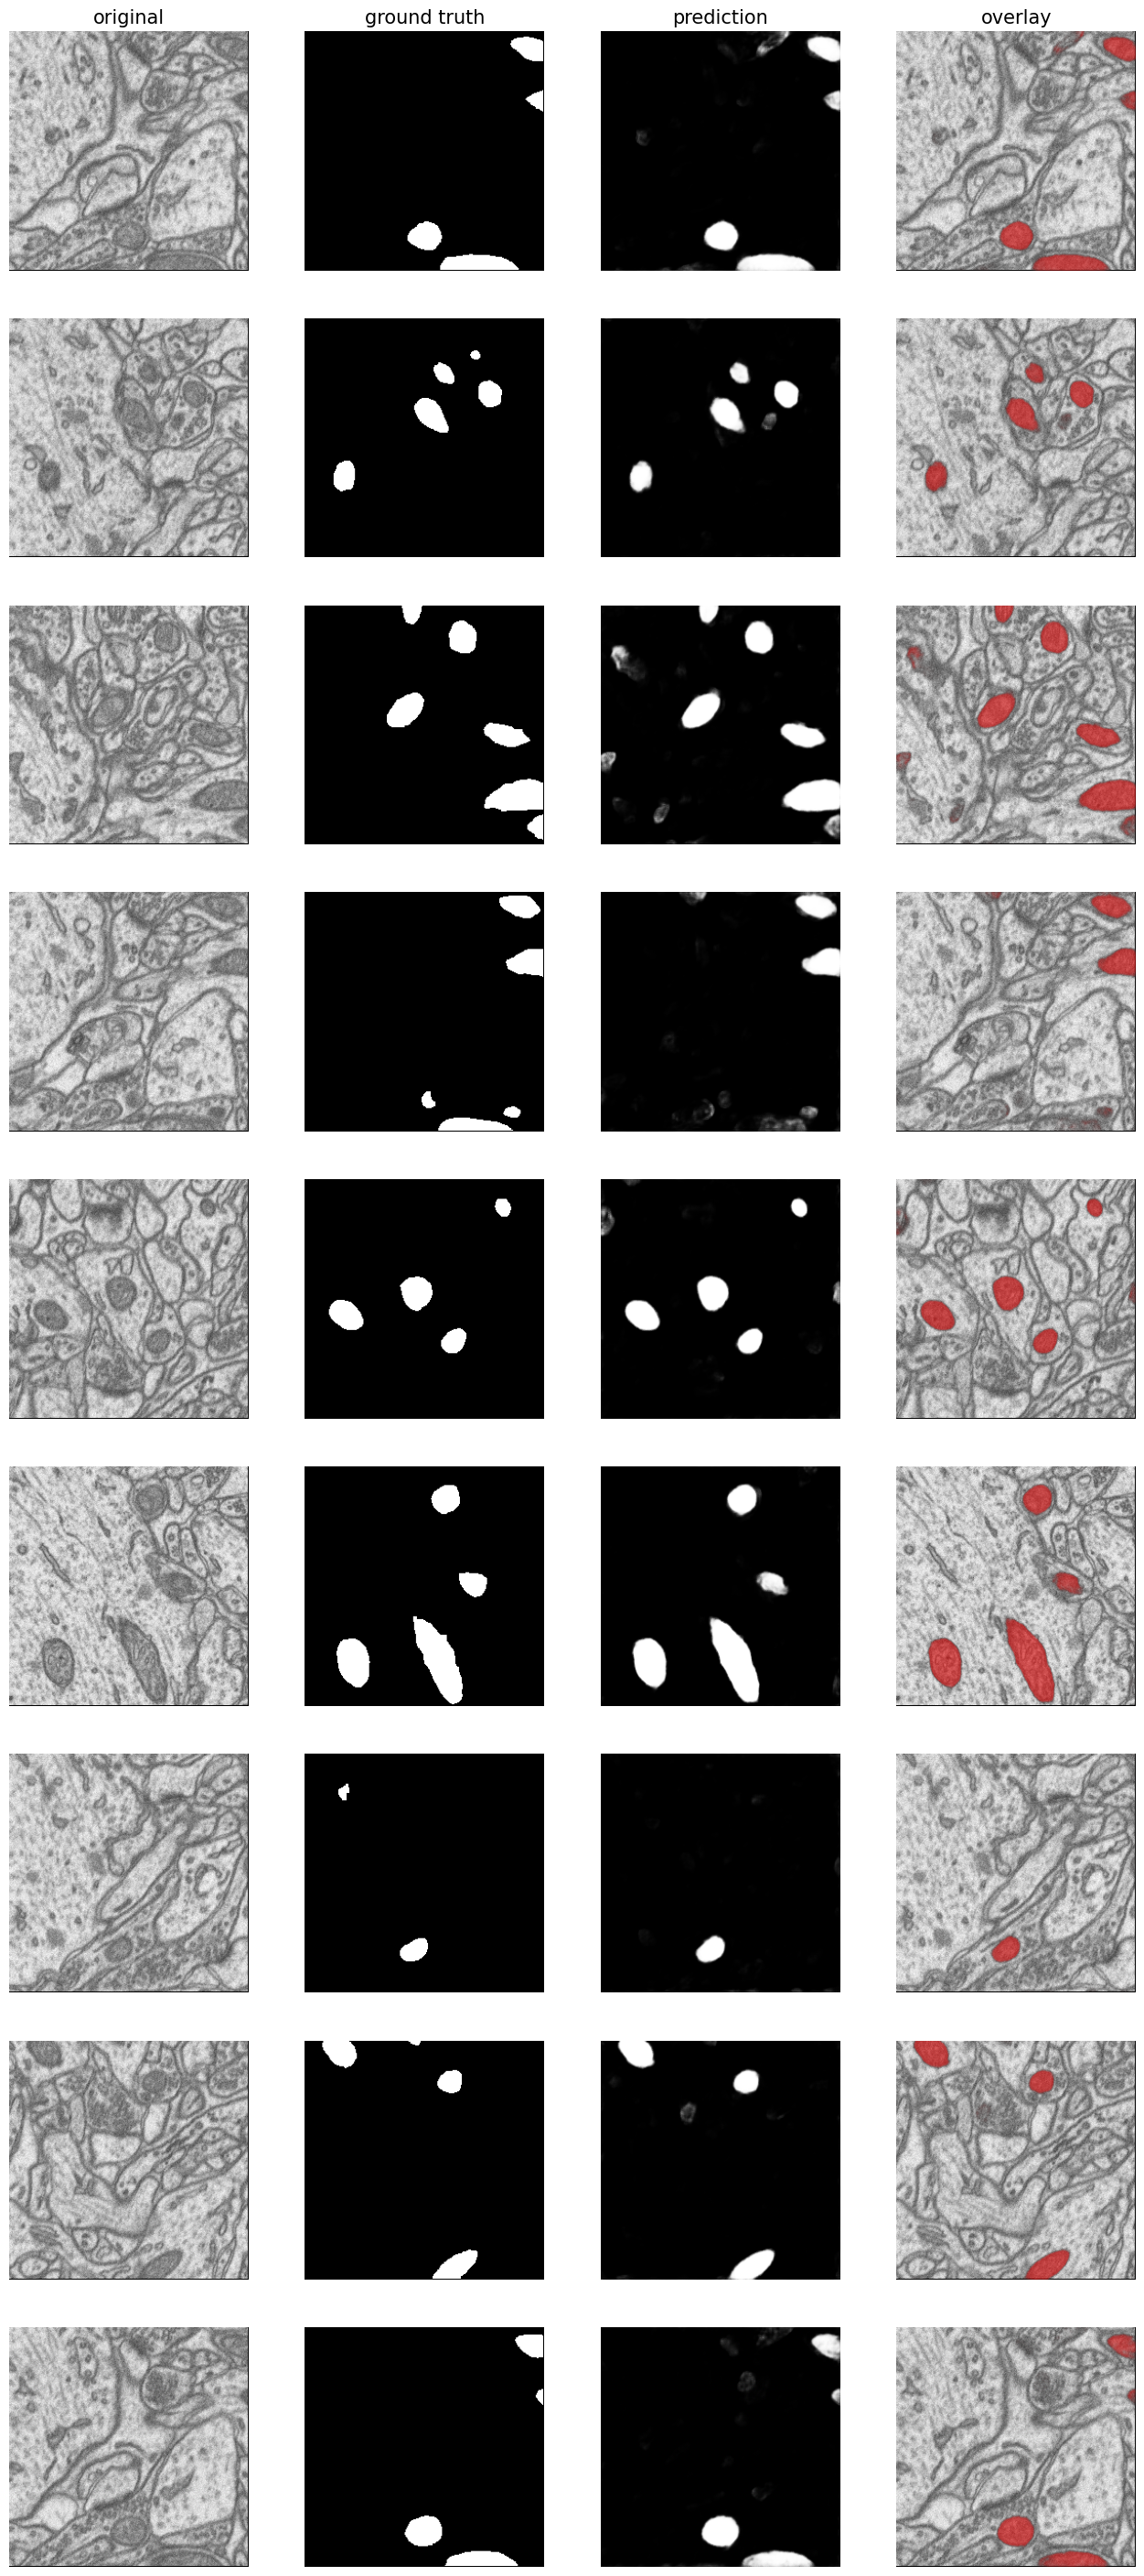

In [ ]:
# ...and look at some results.
plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=9)

In [ ]:
import sklearn.metrics

In [ ]:
# Let's use the Jaccard score to compare a thresholded
# y_pred to the groundtruth y_test.
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.89374885649814

In [ ]:
# TODO: What is the difference between Jaccard Score and Intersect-over-Union from above?
# TODO: YOUR_ANSWER 

# jaccard score  = 0.8937.
# from the above plot we got max Iou = 0.8033

# difference between Jsccard score and Iou = Jaccard score - IoU = 0.8937 - 0.8033 = 0.0904
# difference is  0.0904.

# we know that Jaccard Score = (Area of Intersection) / (Area of Union) , IoU = (Area of Intersection) / (Area of Ground Truth)

# The main difference between Jaccard score and IoU is the context in which they are used. Jaccard score is used to measure the similarity between two sets of data, 
# while IoU is used to measure the overlap between two objects or regions. However, it is worth noting that Jaccard score can also be used to evaluate the performance of object
# detection and segmentation algorithms, by treating the predicted object or region as a set of pixels. In this case, the Jaccard score is calculated between the predicted 
# set of pixels and the ground truth set of pixels, which is similar to the calculation of IoU.


* jaccard score  = 0.8937.
* from the above plot we got max Iou = 0.8033

* difference between Jsccard score and Iou = Jaccard score - IoU = 0.8937 - 0.8033 = 0.0904
* difference is  0.0904.


* we know that Jaccard Score = (Area of Intersection) / (Area of Union) , IoU = (Area of Intersection) / (Area of Ground Truth )



* The main difference between Jaccard score and IoU is the context in which they are used. Jaccard score is used to measure the similarity between two sets of data, while IoU is used to measure the overlap between two objects or regions. However, it is worth noting that Jaccard score can also be used to evaluate the performance of object detection and segmentation algorithms, by treating the predicted object or region as a set of pixels. In this case, the Jaccard score is calculated between the predicted set of pixels and the ground truth set of pixels, which is similar to the calculation of IoU.

In [ ]:
# TODO: Did the U-Net perform well on X_test?
# TODO: YES, it did well.  Jaccard score=0.8937

 YES, it did well.  Jaccard score=0.8937

## 4. Combine U-Net with SAM (10 points)

In [ ]:
# Instead of running SAM in auto mode without seeds (Task 1), we will now
# use the U-Net predictions on X_test to seed the SAM model.

In [ ]:
# We can use the following convenience functions
# to 1) convert mahotas bounding boxes to SAM format
# and 2) combine the SAM output tensors to a mask.

In [ ]:
def mahotas_bbox_to_sam(bbs):

  new_bbs = []

  for i,bb in enumerate(bbs):
    # from (y1, y2, x1, x2)
    # to (x1, y1, x2, y2)
    if i == 0:
      continue
    new_bb = [bb[2], bb[0], bb[3], bb[1]]
    new_bbs.append(new_bb)

  return new_bbs

In [ ]:
def sam_to_mask(results):

  results = results.cpu() # copy back to cpu land

  mask = np.array(results[0,0])

  for s in results:
    mask[s[0] == 1] = 1

  return mask

In [ ]:
# The following code combines the U-Net predictions with SAM.
#
# TODO: Please study the code and answer the TODOs in-line.

In [ ]:
y_pred_sam = y_pred.copy()
y_pred_sam[:] = 0

for z,img in enumerate(X_test):

  # TODO: save a single-channel image as a test.png file, after converting the pixel values to the appropriate range and datatype(uint8)
  mh.imsave('test.png', (img[:,:,0]*255).astype(np.uint8))

  # TODO: comparing predicted label y_pred[z] to a threshold value (0.5 in this case) and returning a binary outcome based on the comparison.
  pred = (y_pred[z] > 0.5)

  # TODO: identify and label connected regions in a binary image
  pred, _ = mh.labeled.label(pred)
  
  # TODO: To calculate the bounding boxes of connected regions in a labeled image
  bbs = mh.labeled.bbox(pred)

  # TODO: to convert bounding box coordinates to the SAM (Segmentation Analysis Module) format string.
  bbs_converted = mahotas_bbox_to_sam(bbs)

  # TODO: To do image segmentation using a vit_l model specified by model_type
  results = SegManualMaskPredictor().image_predict(
      source="test.png",
      model_type="vit_l", # vit_l, vit_h, vit_b
      input_box=bbs_converted, 
      multimask_output=False,
      random_color=False,
      show=False,
      save=False,
  )

  # TODO:  convert the result of the image segmentation to a binary mask
  sam_and_unet_pred = sam_to_mask(results)

  # TODO: assign the sam_and_unet_pred(binary mask)  to the first channel of a 4-dimensional NumPy array y_pred_sam at a specific index z.
  y_pred_sam[z,:,:,0] = sam_and_unet_pred

vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l mo

## 5. Compare U-Net vs. U-Net+SAM. (10 points)

In [ ]:
# U-Net performance on X_test (from Task 3)
sklearn.metrics.jaccard_score(y_test.ravel(), (y_pred > 0.5).ravel())

0.89374885649814

In [ ]:
# U-Net + SAM performance on X_test
sklearn.metrics.jaccard_score(y_test.ravel(), y_pred_sam.ravel())

0.8627273552598484

In [ ]:
# TODO: Please explain the results - is U-Net+SAM a good addition?
# TODO: The Jaccard score clearly better than U-Net+SAM model performance, 0.8937(U-Net) is better than 0.8627(U-Net + SAM)
# No,  U-Net+SAM was not a good addition

 * The Jaccard score clearly better than U-Net+SAM model performance, 0.8937(U-Net) is better than 0.8627(U-Net + SAM)
 * No,  U-Net+SAM was not a good addition

## Bonus: Improve the results. (33 points)

In [ ]:
# Please improve the results of U-Net+SAM and show the improved Jaccard score.

In [ ]:
# TODO: YOUR_CODE

y_pred_sam = y_pred.copy()
y_pred_sam[:] = 0

for z,img in enumerate(X_test):

  # TODO: save a single-channel image as a test.png file, after converting the pixel values to the appropriate range and datatype(uint8)
  mh.imsave('test.png', (img[:,:,0]*255).astype(np.uint8))

  # TODO: comparing predicted label y_pred[z] to a threshold value (0.9 in this case) and returning a binary outcome based on the comparison.
  pred = (y_pred[z] > 0.8)

  # TODO: identify and label connected regions in a binary image
  pred, _ = mh.labeled.label(pred)
  
  # TODO: To calculate the bounding boxes of connected regions in a labeled image
  bbs = mh.labeled.bbox(pred)

  # TODO: to convert bounding box coordinates to the SAM (Segmentation Analysis Module) format string.
  bbs_converted = mahotas_bbox_to_sam(bbs)

  # TODO: To do image segmentation using a vit_l model specified by model_type
  results = SegManualMaskPredictor().image_predict(
      source="test.png",
      model_type="vit_l", # vit_l, vit_h, vit_b
      input_box=bbs_converted, 
      multimask_output=False,
      random_color=False,
      show=False,
      save=False,
  )

  # TODO:  convert the result of the image segmentation to a binary mask
  sam_and_unet_pred = sam_to_mask(results)

  # TODO: assign the sam_and_unet_pred(binary mask)  to the first channel of a 4-dimensional NumPy array y_pred_sam at a specific index z.
  y_pred_sam[z,:,:,0] = sam_and_unet_pred
 



vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l model already exists as 'vit_l.pth'. Skipping download.
vit_l mo

In [ ]:
sklearn.metrics.jaccard_score(y_test.ravel(), y_pred_sam.ravel())

0.8706214844453397

by increasing the threshold value to 0.8, we could improve the Jaccard score to 0.8706

In [ ]:
#
# You made it!!
#
#                 _ ___                /^^\ /^\  /^^\_
#     _          _@)@) \            ,,/ '` ~ `'~~ ', `\.
#   _/o\_ _ _ _/~`.`...'~\        ./~~..,'`','',.,' '  ~:
#  / `,'.~,~.~  .   , . , ~|,   ,/ .,' , ,. .. ,,.   `,  ~\_
# ( ' _' _ '_` _  '  .    , `\_/ .' ..' '  `  `   `..  `,   \_
#  ~V~ V~ V~ V~ ~\ `   ' .  '    , ' .,.,''`.,.''`.,.``. ',   \_
#   _/\ /\ /\ /\_/, . ' ,   `_/~\_ .' .,. ,, , _/~\_ `. `. '.,  \_
#  < ~ ~ '~`'~'`, .,  .   `_: ::: \_ '      `_/ ::: \_ `.,' . ',  \_
#   \ ' `_  '`_    _    ',/ _::_::_ \ _    _/ _::_::_ \   `.,'.,`., \-,-,-,_,_,
#    `'~~ `'~~ `'~~ `'~~  \(_)(_)(_)/  `~~' \(_)(_)(_)/ ~'`\_.._,._,'_;_;_;_;_;
#